In [92]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [93]:
student_data = {
                    "roll_no" : [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
        "name" : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        "programe" : ["Btech", "Bca", "Bsc", "Btech", "Bsc", "Bca", "Bca", "Bca", "Mca", "Btech"],
        "total_marks" : [78, 31, 98, 87, 70, 29, 85, 75, 90, 80],
        "result" : ["Pass", "Fail", "Pass", "Pass", "Pass", "Fail", "Pass", "Pass", "Pass", "Pass"],
        "division" : ["First", "Third", "First", "First", "First", "Third", "First", "First", "First", "First"],
}

In [94]:
data=pd.DataFrame(student_data)
data

,roll_no,name,programe,total_marks,result,division
0,1001,A,Btech,78,Pass,First
1,1002,B,Bca,31,Fail,Third
2,1003,C,Bsc,98,Pass,First
3,1004,D,Btech,87,Pass,First
4,1005,E,Bsc,70,Pass,First
5,1006,F,Bca,29,Fail,Third
6,1007,G,Bca,85,Pass,First
7,1008,H,Bca,75,Pass,First
8,1009,I,Mca,90,Pass,First
9,1010,J,Btech,80,Pass,First


In [95]:
avg_marks = data.groupby("programe")["total_marks"].mean()
avg_marks

programe
Bca      55.000000
Bsc      84.000000
Btech    81.666667
Mca      90.000000
Name: total_marks, dtype: float64

In [96]:
avg_marks.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, Bca to Mca
Series name: total_marks
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 236.0+ bytes


In [97]:
g_division = data.groupby("division")["total_marks"].agg([min, max, sum])
g_division

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\2416602008.py:1: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\2416602008.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\2416602008.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,min,max,sum
division,,,
First,70,98,663
Third,29,31,60


In [98]:
new_group = data.groupby(['programe', 'division'])['total_marks'].agg([min,max,sum])
new_group

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\1089607479.py:1: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\1089607479.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11848\1089607479.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



min  max  sum
programe division               
Bca      First      75   85  160
         Third      29   31   60
Bsc      First      70   98  168
Btech    First      78   87  245
Mca      First      90   90   90

In [99]:
ev_data=pd.read_csv('electric_vehicle.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [100]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [101]:
ev_data=ev_data.dropna()

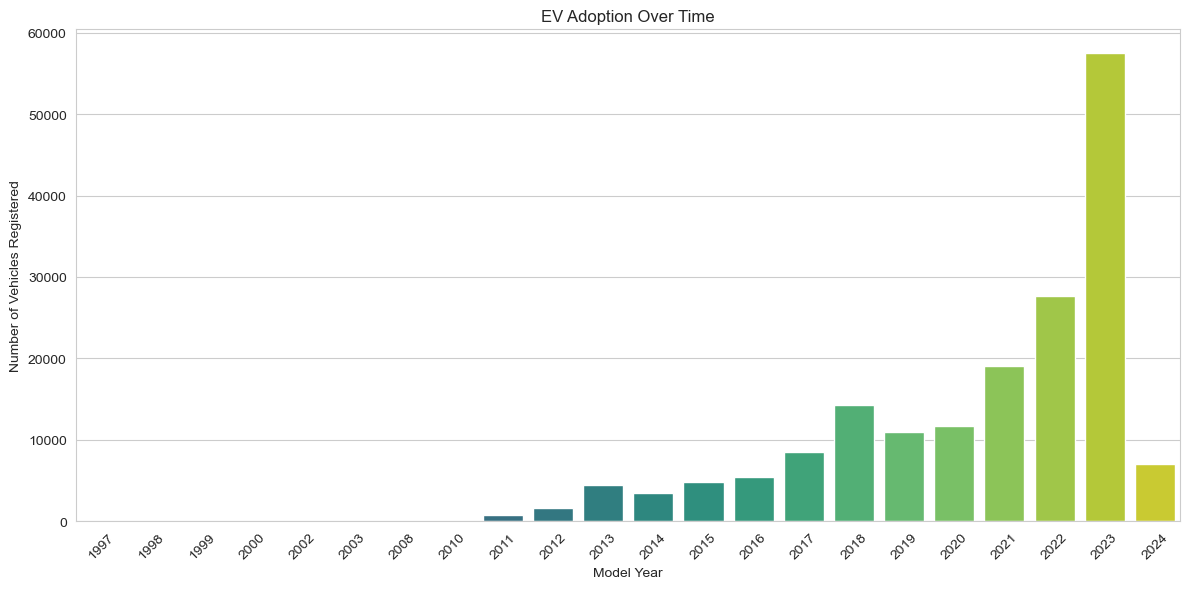

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ev=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev.index,y=ev.values,palette='viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

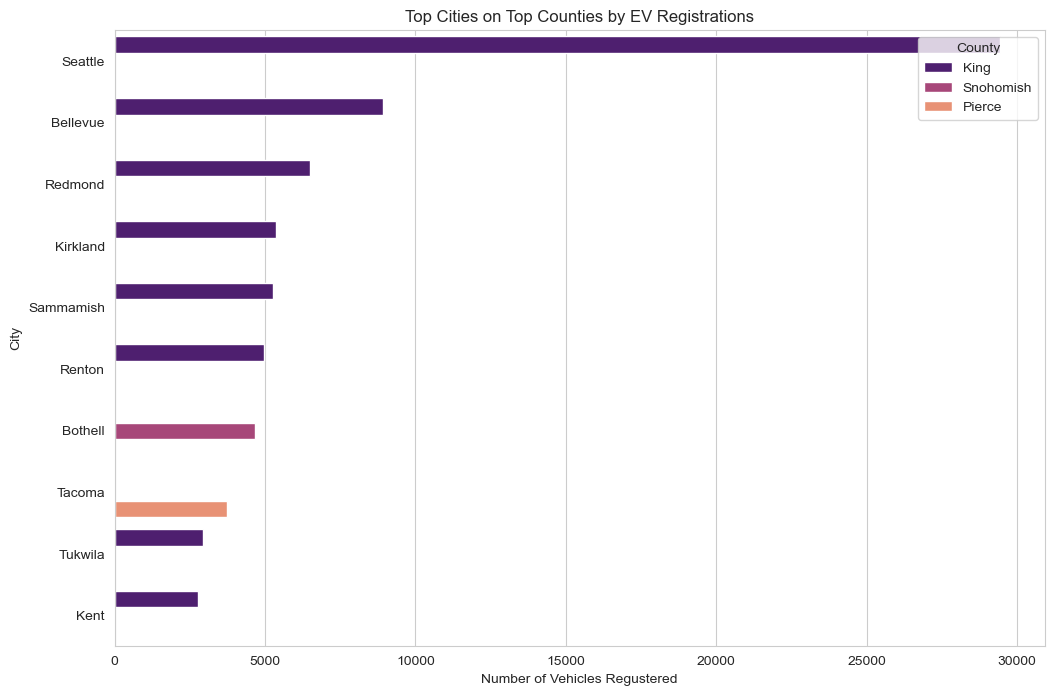

In [103]:
ev_country_distribution=ev_data['County'].value_counts()
top_countries=ev_country_distribution.head(3).index

top_countries_data=ev_data[ev_data['County'].isin(top_countries)]

ev_city_distribution_top_countries=top_countries_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
#lmao ek naya column sa ban gaya hai named->ev_city_distribution_top_countries,with index name->Number of Vehicles..thats has sorted and desc order 
top_cities=ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('Top Cities on Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Regustered')
plt.ylabel('City')
plt.legend(title='County')
plt.show()

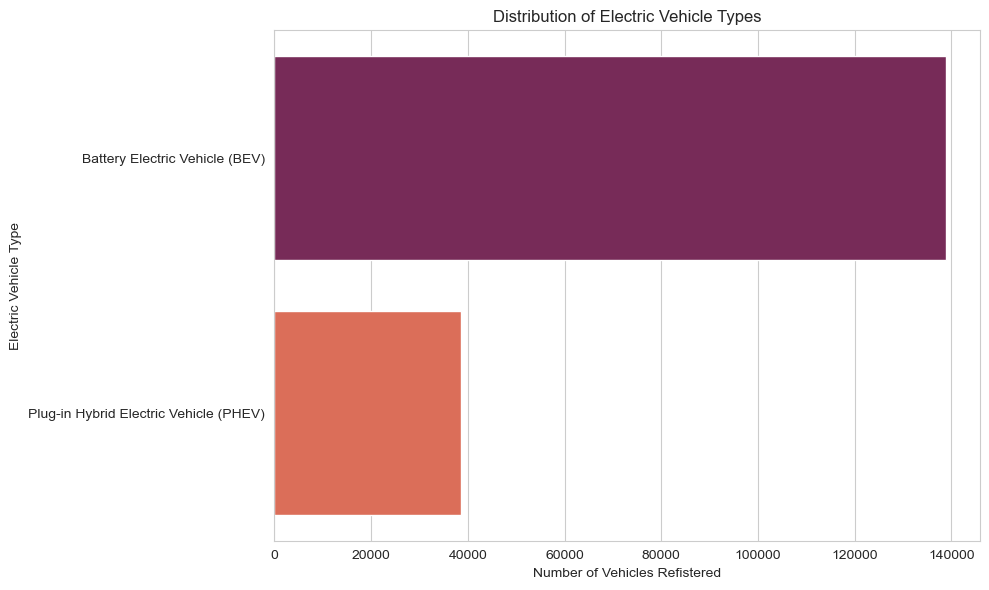

In [104]:
# analyzing the distribution of electric vehicle types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index , palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Refistered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

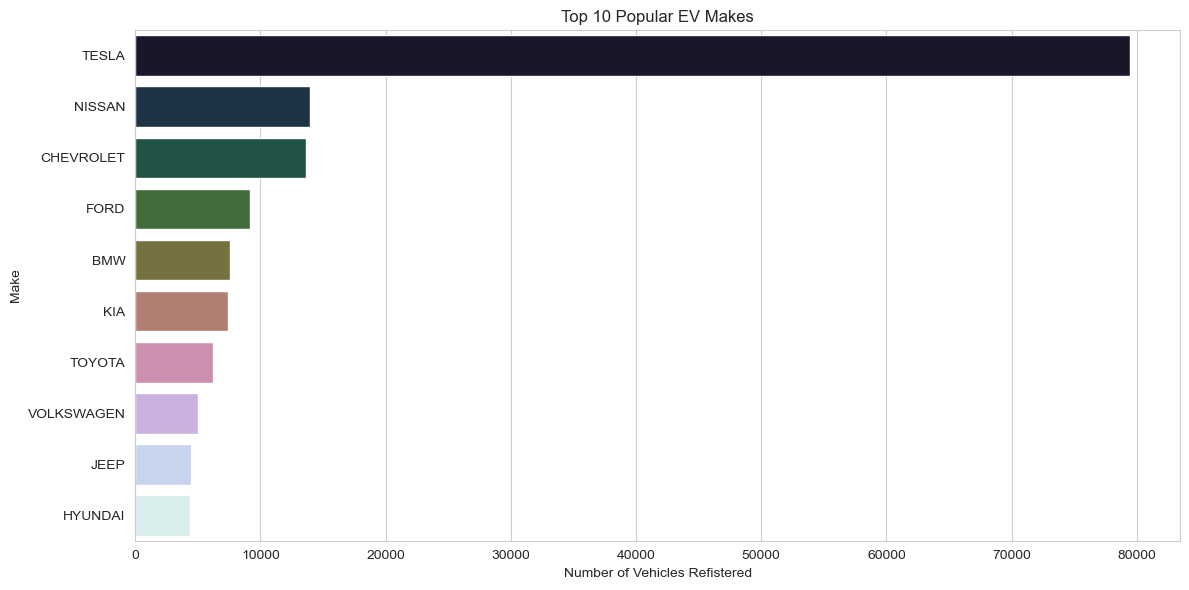

In [105]:
# analyzing the distribution of electric vehicle types
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index , palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Refistered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


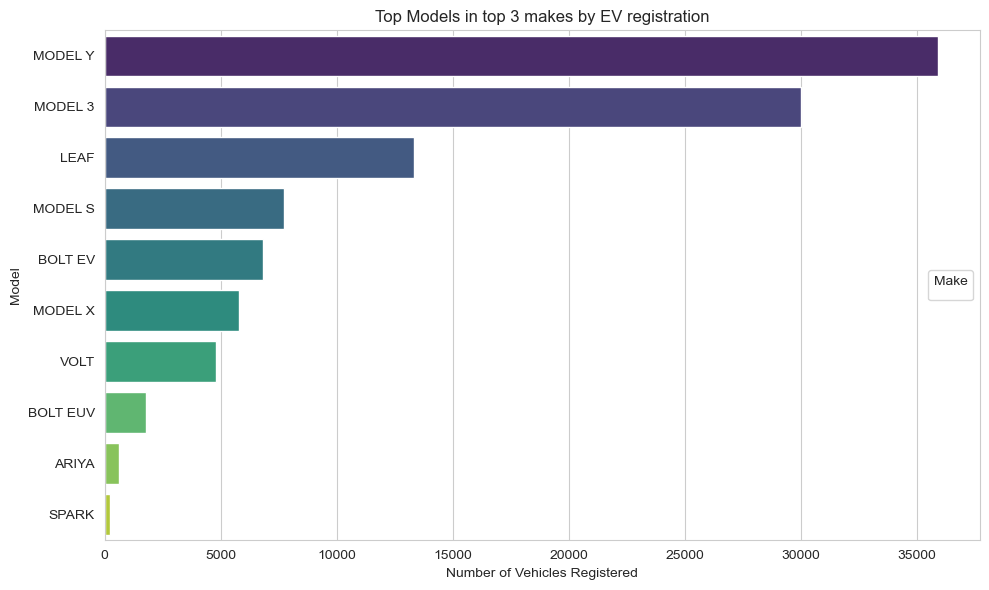

In [106]:
# selecting the top 3 manuacturers based on the number of vehicles registered
top_3_makes =ev_make_distribution.head(3).index

#filtering the dataset foe these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Analyzing the populartiy of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualizing the top 10 models across these manufacturers foe clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Number of Vehicles',y='Model' , palette="viridis",data=top_models)
plt.title('Top Models in top 3 makes by EV registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

In [110]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



KeyError: 'Electric'

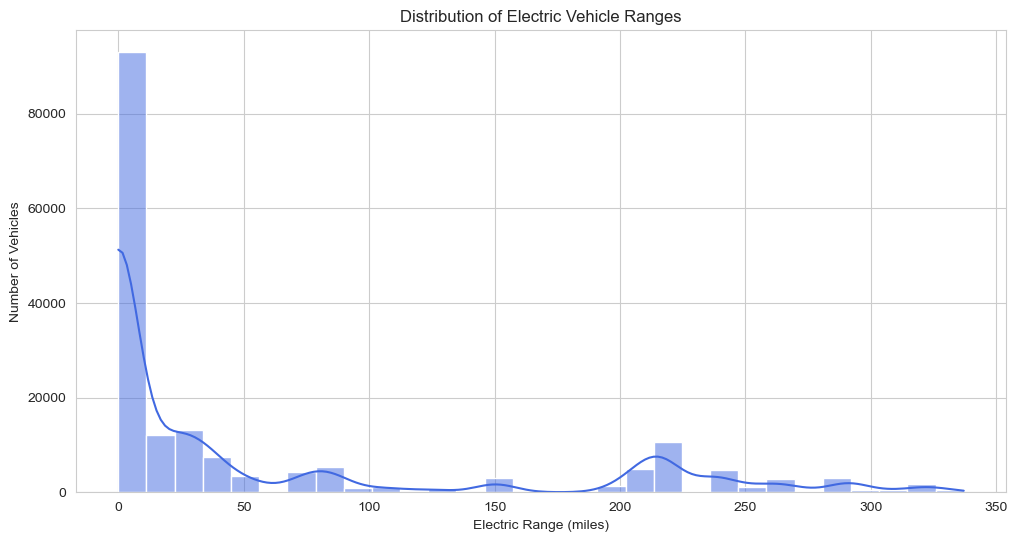

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='__', label=f'Mean Range: {ev_data["Electric"].mean():.2f}miles')

plt.legend()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



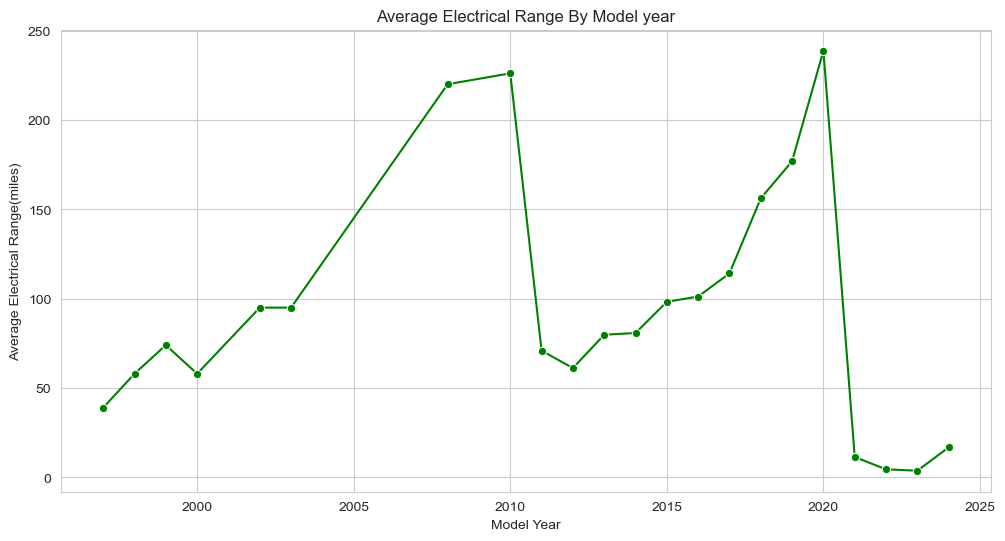

In [112]:
#calculating average electric range by model year

average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=average_range_by_year,marker='o',color='green')
plt.title('Average Electrical Range By Model year')
plt.xlabel('Model Year')
plt.ylabel('Average Electrical Range(miles)')
plt.grid(True)
plt.show()